<a href="https://colab.research.google.com/github/Jennifer-Porto/practicing_data_analysis/blob/main/Praticando_an%C3%A1lise_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


###**Respondendo perguntas do exercício do ciclo 02 da Comunidade DS**

### Importando bibliotecas e base de dados (Airbnb - New York):

In [3]:
#Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

#lendo dados
dados = pd.read_csv('/content/AB_NYC_2019.csv')

## 1. Qual é o intervalo de variação do preço dos alugueis dos imóveis?

  * Saber o valor de preço mais alto

  * Saber o valor de preço mais baixo

  * Subtrair o mais alto com o mais baixo obtendo o intervalo de variação de preço.

**Resposta:** O preço possui uma variação entre 0 a 10.000 dólares, possivelmente devido a promoções ou erros.

In [ ]:
#Visualizando os dados
dados.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#Selecionando a coluna 'price'
preco = dados.loc[:,'price']

#Preço mais alto
preco_max = np.max(preco)

#Preço mais baixo
preco_min = np.min(preco)

#variaçãode preço
print(preco_max - preco_min)

10000


In [ ]:
#Resolução correta: saber o desvio padrão
#calculando a média da coluna price
media = dados.loc[:,'price'].mean()
#desvio padrão
desvio_padrao = np.std(dados.loc[:,'price'])
print(f'A média de preços é de {media:.2f} +/- {desvio_padrao:.2f}')

A média de preços é de 152.72 enquanto o desvio padrão é 240.15


## 2. Qual a distribuição dos imóveis de acordo com o número mínimo de pernoites que podem ser agendado?

* Selecionar a coluna sobre pernoites (minimun_ningths)

* Selecionar a coluna de tipo de imóveis (room_type)

* Saber os valores únicos de tipo de imóveis

* Saber o número mínimo de pernoites por imóveis

* Gerar um histograma sobre isso

**Resposta:** Se tratando de imóveis completos o número de pernoites varia entre 25 a 200. Enquanto que nos imóveis com cômodos privados essa variação diminui para em torno de 20 a 100 pernoites. No caso dos quartos compartilhados a variação é significativamente menor comparado aos anteriores, tendo uma concentração maior entre 10 a 30 pernoites. Apesar disso, todos os tipos de imóveis apresentam um leve aumento quando o número de pernoites gira em torno de 1000 dias.

(0.0, 200.0)

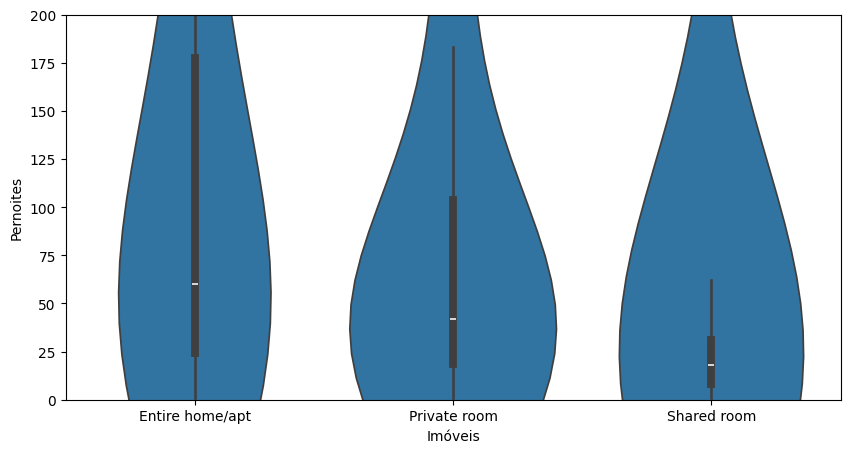

In [ ]:
#Visualizando dados
dados.head()

#Valores únicos de tipo de imóveis
tipos_imoveis = dados.loc[:,'room_type'].unique()

#data frame
df = dados.groupby(['room_type','minimum_nights']).size().reset_index(name = 'count')

plt.figure(figsize = (10,5))
sb.violinplot(data = df, x = 'room_type', y = 'minimum_nights')
plt.xlabel('Imóveis')
plt.ylabel('Pernoites')
plt.ylim(0,200)




## 3. Qual a média e a mediana de imóveis cadastrado por host (dono do imóvel)?

* Contar quantas vezes aparece o mesmo host_id para saber o número de imóveis cadastrado
* Calcular a média e a mediana dessa contagem

**Resposta:** A média de imóveis cadastrado por host é de 1.31 e a mediana é 1.

In [ ]:
#visualizando os dados
dados.head()

#contagem de hosts
host_id_contagem = dados.groupby('host_id').size().reset_index(name='count')

#Sabendo a média e mediana
media = host_id_contagem['count'].mean()
mediana = host_id_contagem['count'].median()

print(f'A média é {media:.2f} e a mediana é {mediana:.2f}')

A média é 1.31 e a mediana é 1.00


In [ ]:
#Resolução  correta
#media
media = dados.loc[:,'calculated_host_listings_count'].mean()
median = dados.loc[:, 'calculated_host_listings_count'].median()

print(f'A média é {media:.2f} e a mediana é {median:.2f}')

A média é 7.14 e a mediana é 1.00


## 4. Número de avaliação por mês

* Selecionar as colunas de avaliações por mês e imóveis

* Gerar histograma e interpretar

**Resposta:** Um número significativamente grande de imóveis possuem poucas avaliações.

(0.0, 1000.0)

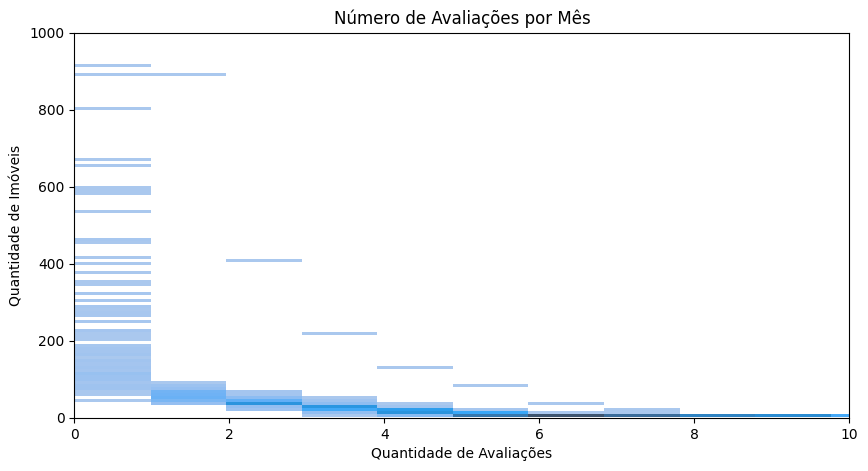

In [ ]:
#visualizando dados
dados.head()

#agrupando colunas selecionadas
df = dados.groupby(['reviews_per_month']).size().reset_index(name='count')

#gerando o gráfico
plt.figure(figsize= (10,5))
plt.title('Número de Avaliações por Mês')
sb.histplot(data = df, x = 'reviews_per_month', y= 'count')
plt.xlabel('Quantidade de Avaliações')
plt.ylabel('Quantidade de Imóveis')
plt.xlim(0,10)
plt.ylim(0,1000)

<ipython-input-9-e512644e2d37>:8: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0,5,1)


(0.0, 5.0)

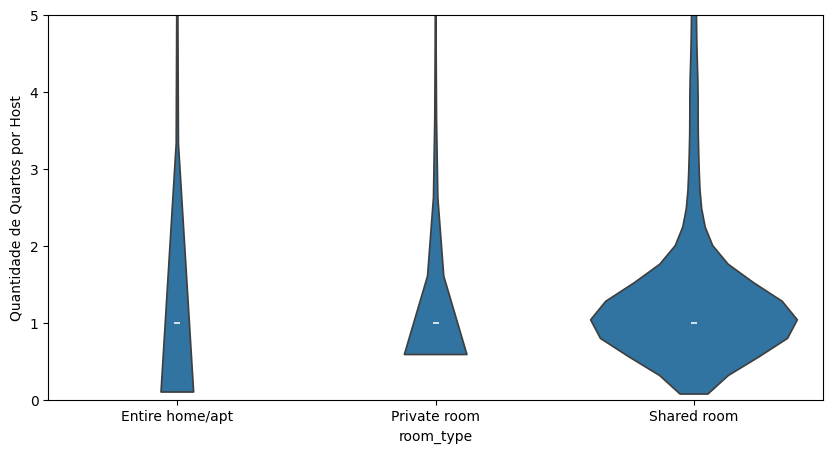

In [ ]:
'''
Esta célula foi usada apenas para brincar com os códigos
e descobrir novos gráficos :D
'''

#Data frame
df = dados.groupby(['room_type','host_id']).size().reset_index(name = 'count')

#plotando gráfico
plt.figure(figsize = (10,5))
sb.violinplot(data = df, x = 'room_type', y = 'count')
plt.ylabel('Quantidade de Quartos por Host')
plt.ylim(0,5,1)

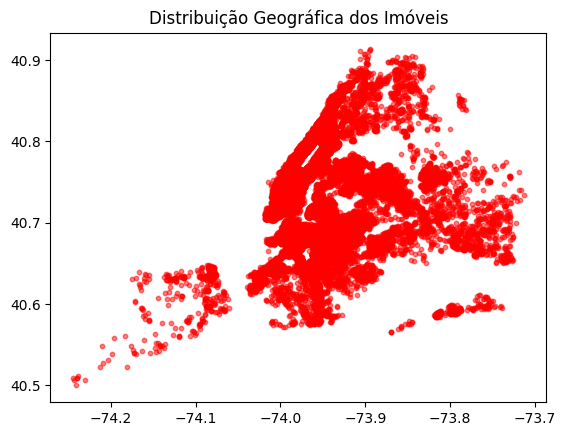

In [ ]:
'''
Esta célula foi usada apenas para brincar com os códigos
e descobrir novos gráficos :D
'''

#plotar histograma para saber a distribuição geográfica
plt.scatter(dados['longitude'], dados['latitude'], alpha=0.5, c='red', s=10)
plt.title('Distribuição Geográfica dos Imóveis')
plt.show()



## 6. Qual a data mais recente da última avaliação?

* Verificar o tipo de dados da coluna 'last_review'

* Converter para data

* Ver a mais recente de todas

**RESPOSTA:** A data mais recente é 8 de Julho de 2019


In [ ]:
#verificando o tipo de dados
datatypes = dados.dtypes

#convertendo para data
dados['last_review']= pd.to_datetime(dados['last_review'])

#ordenar para a data mais recente
dados['last_review'].max()


Timestamp('2019-07-08 00:00:00')

## 7. Qual o valor máximo de pernoites agendadas?

* Valor máximo da coluna 'minimum_nights'

**RESPOSTA:** O valor máximo de pernoites agendadas é de 1250

In [ ]:
dados['minimum_nights'].max()

1250

## 8. Como você interpretaria o seguinte valor do desvio padrão?
Preço médio da concorrência é de 180 dólares +/- 20 dólares

**RESPOSTA:** Quer dizer que o preço da concorrência pode variar 20 dólares para mais ou para menos em comparação com a média.

## 9. Quantos nomes de donos de imóveis são únicos?

* Saber o valor único dos host_name

* Contar os nomes

**RESPOSTA:** O total de nomes únicos de donos de imóveis é de 11.452

In [4]:
#Valor único dos hosts
host_unicos = dados.groupby(['host_id']).size().reset_index(name = 'count')
host_unicos
#Contar os nomes únicos
host_unicos['host_id'].count()

37457